In [17]:
import numpy as nump;
import matplotlib.pyplot as pplot;
import pandas as p;
import seaborn as sb;
dataurl="http://lib.stat.cmu.edu/datasets/boston";
columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'];
bdf=p.read_csv(dataurl,sep="\s+",skiprows=22,header=None,names=columns);
print(bdf.head());

        CRIM     ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.00   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  396.90000   4.98  24.00   NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2    0.02731   0.00   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3  396.90000   9.14  21.60   NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4    0.02729   0.00   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO   B  LSTAT  MEDV  
0     15.3 NaN    NaN   NaN  
1      NaN NaN    NaN   NaN  
2     17.8 NaN    NaN   NaN  
3      NaN NaN    NaN   NaN  
4     17.8 NaN    NaN   NaN  


In [26]:
print(bdf.isnull().sum());

CRIM          0
ZN            0
INDUS         0
CHAS        506
NOX           0
RM          506
AGE         506
DIS         506
RAD         506
TAX         506
PTRATIO     506
B          1012
LSTAT      1012
MEDV       1012
dtype: int64


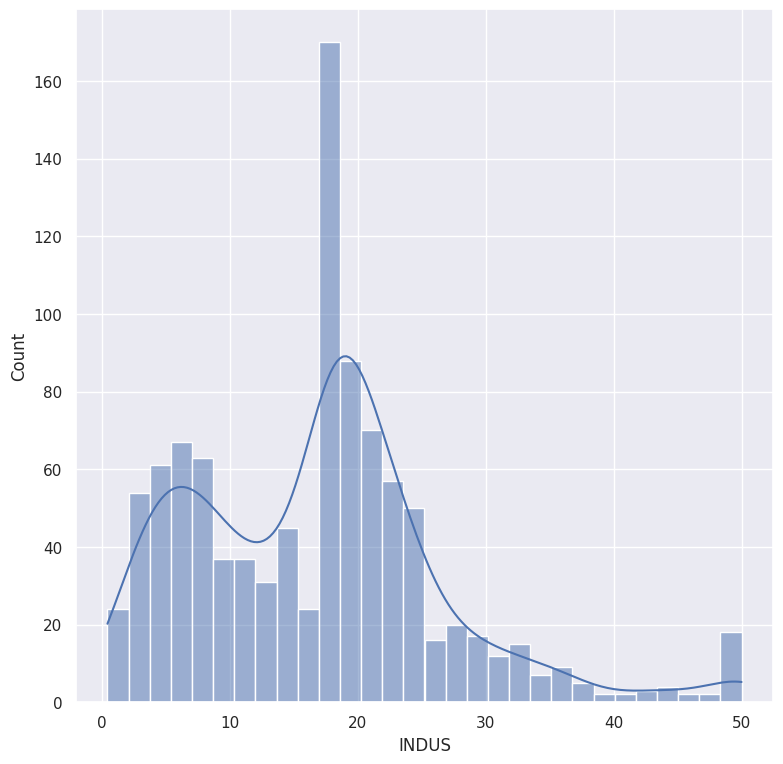

In [57]:
pplot.figure(figsize=(9,9));
sb.histplot(bdf['INDUS'],bins=30,kde=True);
pplot.show();

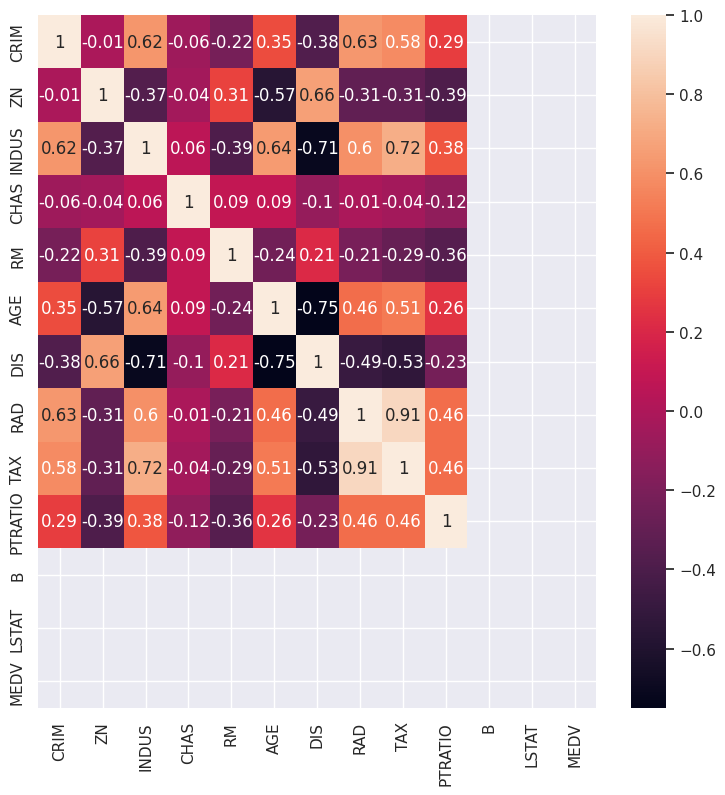

In [56]:
pplot.figure(figsize=(9,9));
cor_mat=bdf.corr(numeric_only=True).round(2);
sb.heatmap(data=cor_mat,annot=True);

In [74]:
pplot.figure(figsize=(20,10));
features=['ZN','CRIM'];
target=bdf['INDUS'];
for i,col in enumerate(features):
  pplot.subplot(1,len(features),i+1);
  x=bdf[col];
  y=target;
  pplot.scatter(x,y,marker='o');
  pplot.title(col);
  pplot.xlabel(col);
  pplot.ylabel('INDUS');

In [77]:
X=p.DataFrame(nump.c_[bdf['ZN'],bdf['CRIM']],columns=['ZN','CRIM']);
Y=bdf['INDUS'];
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5);
print(X_train.shape);
print(X_test.shape);
print(Y_train.shape);
print(Y_test.shape);

(809, 2)
(203, 2)
(809,)
(203,)


In [79]:
from sklearn.linear_model import LinearRegression;
from sklearn.metrics import mean_squared_error;
lin_model=LinearRegression();
lin_model.fit(X_train,Y_train);

In [86]:
from sklearn.metrics import r2_score
y_train_predict=lin_model.predict(X_train);
rmse=(nump.sqrt(mean_squared_error(Y_train,y_train_predict)));
r2=r2_score(Y_train,y_train_predict);
print("Model Performance for:\n\n1. Training Set");
print('RMSE = '+format(rmse));
print('R2 Score = '+format(r2));
y_test_predict=lin_model.predict(X_test);
rmse=(nump.sqrt(mean_squared_error(Y_test,y_test_predict)));
r2=r2_score(Y_test,y_test_predict);
print("\n2. Testing Set");
print('RMSE = '+format(rmse));
print('R2 Score = '+format(r2));

Model Performance for:

1. Training Set
RMSE = 6.758456605311705
R2 Score = 0.5294067008278772

2. Testing Set
RMSE = 7.315922373262135
R2 Score = 0.4732898100836683
